# 1st Assignment on Medical Image Processing

## LU 183.630 - 2025 SoSe

---

### 2. Assignment

The aim of the first lab exercise is to get familiar with **Python**, the implementation of **Principal Component Analysis (PCA)**, and the investigation of its characteristics. Parts of the code (data, plot functions) are provided so that students can focus on the main topics of the assignment.

---

#### 2.1 Helper Functions in helper_functions.py

- `get_data()` loads all the neccecary variables that you will be working on
- `plot2DPCA()` and `plot3DPCA()` can be used to plot:
  - Data points
  - Eigenvectors & eigenvalues
  - Ellipses & ellipsoids
  - Reconstructed data
- `plotDemo()` demonstrates their usage.

### Import necessary libraries and functions for this assignment

In [103]:
from helper_functions import plot2DPCA, plot3DPCA, get_data, plotDemo
import numpy as np
import matplotlib.pyplot as plt

# Demo

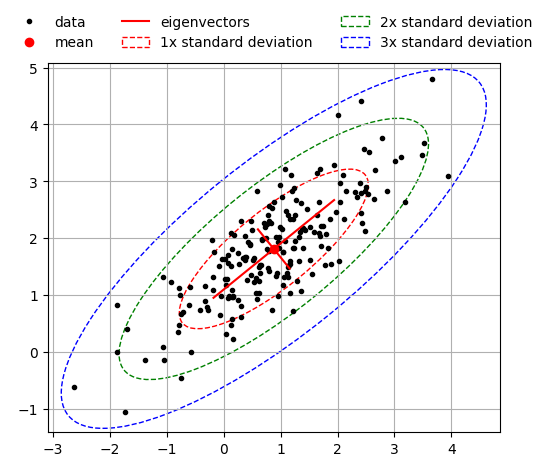

In [104]:
plotDemo()

### Load the data used in this assignment

In [105]:
#load data using helper function
data0, data1, data2, data3d, bones = get_data()

data0 shape: (200, 2)
data1 shape: (200, 2)
data2 shape: (200, 2)
data3d shape: (1000, 3)
bones shape: (128, 2, 14)


## Tasks: 
#### In this exercise, data points are given in a d × n-Matrix X, where n denotes the number of points and their dimensionality, i.e. 2 × n  for a set of 2D points (data0, data1, data2) and 3 × n for points in 3D (data3d).

## 1. Covariance Matrix

#### (a) Implement a function `ourCov(X)` that computes the covariance matrix `C` from a data matrix `X`. (3 Points)

- You are **not allowed** to use any built-in function that directly computes the covariance matrix.
- You **may use** basic NumPy operations such as `mean`, matrix multiplication, and `transpose`.
- After implementing `ourCov`, **compare** its output to the result of `np.cov`.
  - **Note:** `np.cov` expects a matrix of shape **d × n** (n_features × n_samples), so you may need to transpose your input before using it.

In [106]:
def ourCov(X):
    """
    Computes the covariance matrix of the input data X.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features)

    Returns:
        C (numpy.ndarray): Covariance matrix
    """
    
    # TODO: Get number of samples
    # number of rows = samples, columns = features
    n_samples, n_features = X.shape
    print(n_samples)
    print(n_features)

    # TODO: Compute the mean vector
    # mean of each feature / column
    mean_vector = np.mean(X, axis=0)

    # TODO: Center the data
    # subtract mean from each feature / column
    centered_data = X - mean_vector

    # TODO: Compute the covariance matrix
    # plug into convariance formula from the slides
    C = np.dot(centered_data.T, centered_data) / (n_samples - 1)


    return C

In [107]:
for data in [data0, data1, data2]:

    print('ourCov')
    print(ourCov(data), '\n\n')

    print('np.cov')
    print(np.cov(data.T, bias=True), '\n\n')

ourCov
200
2
[[0.93801567 0.67673206]
 [0.67673206 1.03561669]] 


np.cov
[[0.93332559 0.6733484 ]
 [0.6733484  1.03043861]] 


ourCov
200
2
[[ 0.92874144 -0.90833726]
 [-0.90833726  0.99135749]] 


np.cov
[[ 0.92409773 -0.90379557]
 [-0.90379557  0.98640071]] 


ourCov
200
2
[[0.88767296 0.01673861]
 [0.01673861 1.00601482]] 


np.cov
[[0.88323459 0.01665492]
 [0.01665492 1.00098475]] 




### (b) Compute the covariance matrix `C` for all data matrices (`data0`, `data1`, `data2`). (3 Points)

- Visualize each dataset using `plt.scatter()` in **separate figures**.
- Set the axis scale to equal using `plt.axis('equal')`.
- **Interpret the resulting covariance matrices** for each dataset:
  - What do the individual entries of `C` represent?
  - Which position in `C` holds which type of information (e.g., variance, correlation)?

Covariance matrix of data 1:
200
2
[[0.93801567 0.67673206]
 [0.67673206 1.03561669]]


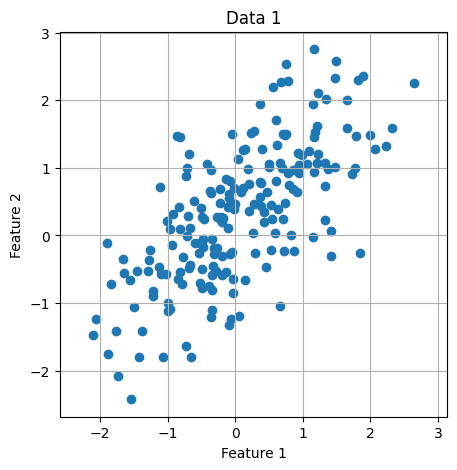

Covariance matrix of data 2:
200
2
[[ 0.92874144 -0.90833726]
 [-0.90833726  0.99135749]]


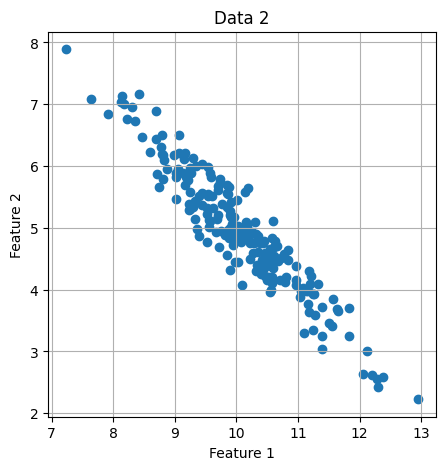

Covariance matrix of data 3:
200
2
[[0.88767296 0.01673861]
 [0.01673861 1.00601482]]


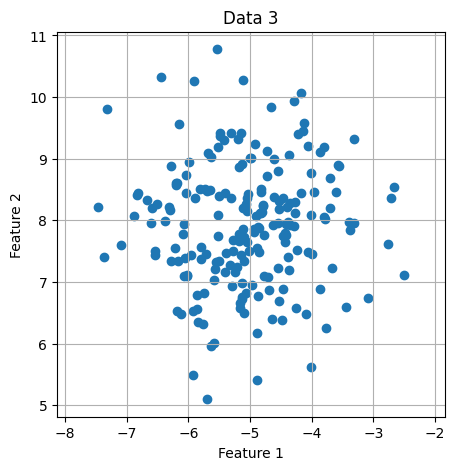

In [108]:
import matplotlib.pyplot as plt

for i, data in enumerate([data0, data1, data2], start=1):
    
    fig = plt.figure(figsize=(5, 5))

    # TODO: Compute and print the covariance matrix
    print(f"Covariance matrix of data {i}:")
    # Use ourCov() from above to compute the covariance matrix, then print it
    C = ourCov(data)
    print(C)
    
    # TODO: Plot the data
    # Plot feature 1 on x-axis and feature 2 on y-axis
    plt.scatter(data[:, 0], data[:, 1])
    # Set scale ratio to equal so distances are proportional
    plt.axis("equal")
    # Labelling
    plt.title(f"Data {i}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Individual entries of covariance matrix C:
# C[i, j] says how feature i and j vary together:
# - Diagonal entries C[i, i] represent variance of feature i 
#   (how much this single feature spreads out)
# - Off-diagonal entries C[i, j] represent covariance between feature i and j 
#   (how they change in relation to each other)
#   data1: positive off-diagonal, bottom left to top right, the increase (and/or theoretically decrease) together
#   data2: negative off-diagonal, top left to bottom right, one feature increases and the other decreases
#   data3: near zero diagonal, no clear relationship between features



## 2. PCA

### (a) Implement a function `pca(X, n_components)` that performs Principal Component Analysis (PCA) on a data matrix `X`. (3 Points)

- The implementation must work for data of **any dimensionality** (i.e., arbitrary number of features).
- The function should return:
  - The **eigenvalues**, sorted in **descending order**.
  - The corresponding **normalized eigenvectors**, sorted according to their eigenvalues.
- You may use NumPy’s `np.linalg.eig()` function to compute eigenvalues and eigenvectors.

In [109]:
def pca(X, n_components=None):
    """
    Perform Principal Component Analysis (PCA) on the input data matrix X.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features)
        n_components (int or None): Number of principal components to retain. If 'None' retain all

    Returns:
        X_reduced (numpy.ndarray): Projected data
        eigvecs_reduced (numpy.ndarray): Selected eigenvectors
        eigvals_selected (numpy.ndarray): Selected eigenvalues
        mean (numpy.ndarray): Mean used for centering
    """

    # TODO: Center the data
    # Subtract Mean from Data (X)
    mean=np.mean(X,axis=0)
    X=X-mean
    # TODO: Compute the covariance matrix
    covarianceMatrix=ourCov(X)
    # TODO: Compute eigenvalues and eigenvectors
    # Use np.linalg.eig to calculate eigenvalue and eigenvector
    eigenvalues,eigenvectors=np.linalg.eig(covarianceMatrix)
    # TODO: Sort eigenvalues and eigenvectors in descending order
    # Sort by eigenvalue --> Done by seting eigenvalue negative so the largest number becomes the smallest since argsort sorts accending
    idx=np.argsort(-eigenvalues)
    sortedEigenvalue=eigenvalues[idx]
    sortedEigenvectors=eigenvectors[:,idx]
    # TODO: Select the top n_components
    # Use the input "n_components" to extract the biggest eigenvalues and eigenvectors 
    eigvals_selected=sortedEigenvalue[:n_components]
    eigvecs_reduced=sortedEigenvectors[:,:n_components]
    # TODO: Project data onto principal components
    # Matrix Multiplication using X and eigvecs_reduced
    X_reduced = X @ eigvecs_reduced
    return X_reduced, eigvecs_reduced, eigvals_selected, mean

### (b) Use plot2DPCA to plot results for all matrices (data0, data1, data2) (2 Points)

200
2


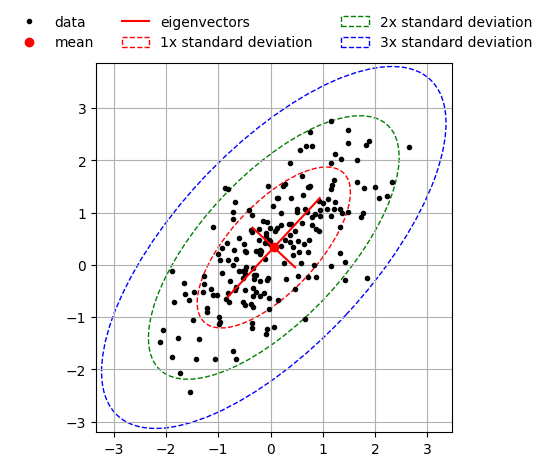

200
2


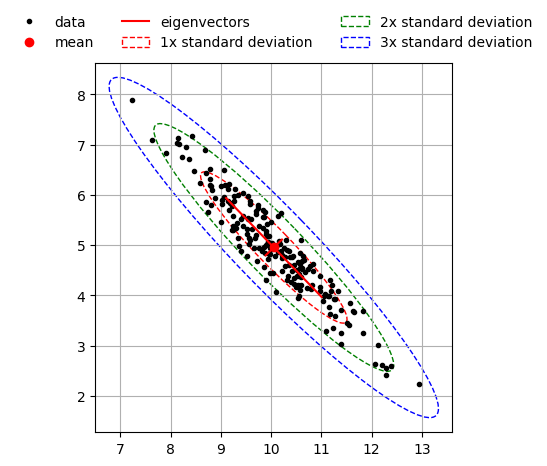

200
2


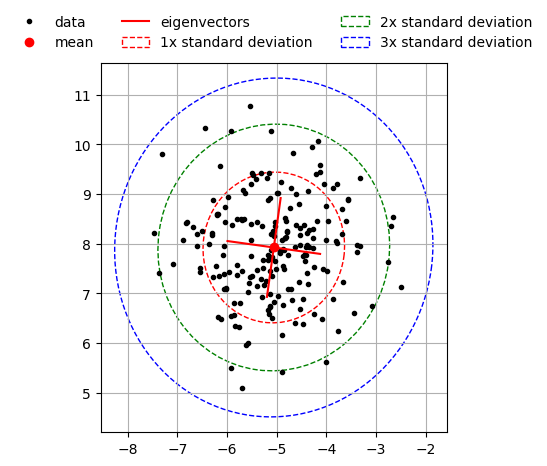

In [110]:
for data in [data0, data1, data2]:

    # TODO: Perform PCA
    d,eigVec,eigVal,mju=pca(data,2)
    # Plot using the plot2DPCA function
    plot2DPCA(
        data=data,
        mju=mju,
        eigVec=eigVec,
        eigVal=eigVal,
        showStd=True,
    )

### (c) What do the **eigenvectors** represent?  (2 Points)
- Where can this information be seen in the plot?  


### (d) What do the **eigenvalues** represent?  (3 Points)
- Where can this information be seen in the plot?  
- Is there a connection to the **total variance** of the data?  

### (e) How does **omitting the mean subtraction** from the data matrix `X` affect the computation of PCA? (2 Points)
- Explain the consequences.  

## 3. Subspace projection

### (a) PCA Projection and Reconstruction on 2D Data

First: **(2 Points)**
- Perform **PCA** on `data1`.
- Project the data onto the **first principal component** (main vector).
- **Plot** the projected data.
- What is the **dimensionality** of the data after projection?

Second: **(3 Points)**
- Reconstruct the data from the projection back into the original 2D space.
- Plot the reconstructed data alongside the original data using `plot2DPCA`
- **Describe** the effects of the projection and reconstruction:
  - How do the reconstructed points compare to the original ones?
- Compute the **average reconstruction error** (e.g., mean squared error between original and reconstructed points).
- How would the **average reconstruction error** change if you did the same for `data2`

200
2


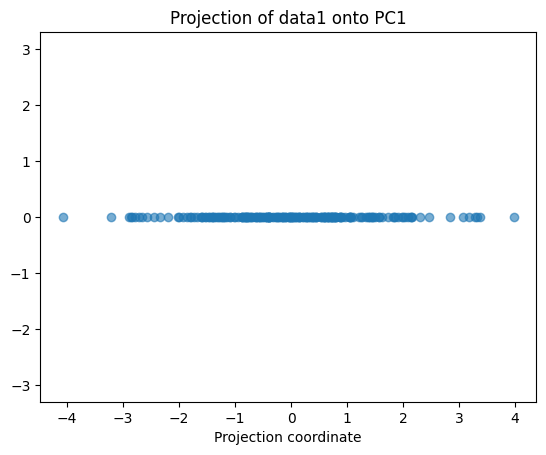

Shape of projected data1: (200, 1)


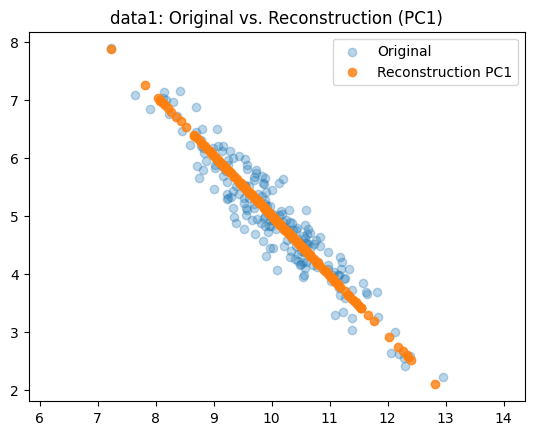

Average reconstruction error for data1: 0.0255
200
2
Average reconstruction error for data2: 0.4405


In [111]:
# TODO: Apply PCA and project to first component
X1_red, eigvecs1, eigvals1, mean1 = pca(data1, n_components=2)
z1 = X1_red[:, 0:1]
# TODO: Visualize projection
plt.figure()
plt.scatter(z1, np.zeros_like(z1), alpha=0.6)
plt.title("Projection of data1 onto PC1")
plt.xlabel("Projection coordinate")
plt.axis('equal')
plt.show()

# TODO: Print the shape of the projected data
print("Shape of projected data1:", z1.shape)

# TODO: Reconstruct from projection
X1_rec_centered = z1 @ eigvecs1[:, 0:1].T
X1_rec = X1_rec_centered + mean1

# TODO: Plot reconstruction and compare to original
plt.figure()
plt.scatter(data1[:, 0], data1[:, 1], alpha=0.3, label="Original")
plt.scatter(X1_rec[:, 0], X1_rec[:, 1], alpha=0.8, label="Reconstruction PC1")
plt.axis("equal")
plt.legend()
plt.title("data1: Original vs. Reconstruction (PC1)")
plt.show()

# TODO: Compute reconstruction error and print it
reconstruction_error_data1 = np.mean((data1 - X1_rec) ** 2)
print(f"Average reconstruction error for data1: {reconstruction_error_data1:.4f}")

# TODO : Repeat for data2 and compare results
X2_red, eigvecs2, eigvals2, mean2 = pca(data2, n_components=2)
z2 = X2_red[:, 0:1]
X2_rec = (z2 @ eigvecs2[:, 0:1].T) + mean2
reconstruction_error_data2 = np.mean((data2 - X2_rec) ** 2)
print(f"Average reconstruction error for data2: {reconstruction_error_data2:.4f}")


### (b) Reconstruction Using the Second Principal Component (2 Points)

- Repeat the steps from (a), but this time project the data onto the **second principal component** (side vector).
- Reconstruct the data and analyze the results.
- Which principal component would you choose to achieve a reconstruction with **minimal error**, using **only one component**?
  - Justify your answer based on error and visual comparison.

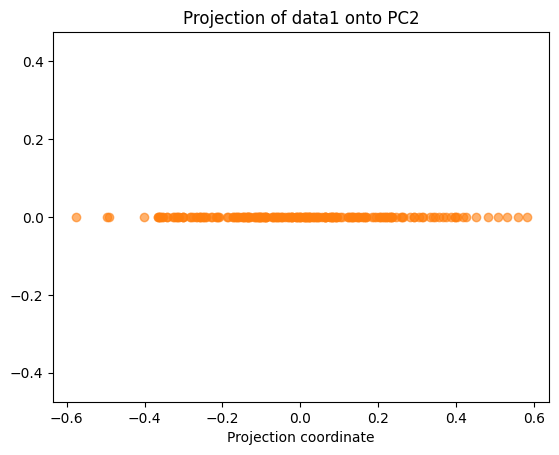

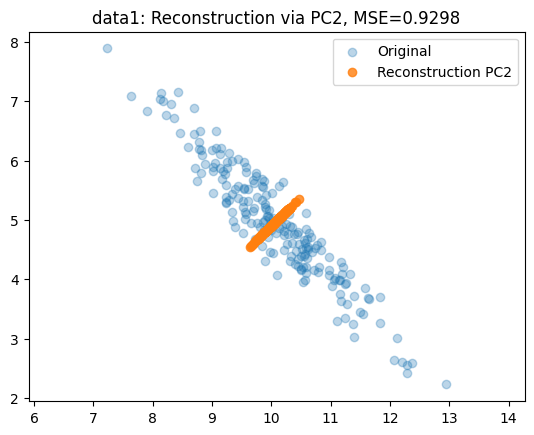

Average reconstruction error for data1: 0.9298


In [112]:
# TODO: Reconstruct from projection
z1_pc2 = X1_red[:, 1:2]
plt.figure()
plt.scatter(z1_pc2, np.zeros_like(z1_pc2), alpha=0.6, color='C1')
plt.title("Projection of data1 onto PC2")
plt.xlabel("Projection coordinate")
plt.axis('equal')
plt.show()
X1_rec_pc2 = (z1_pc2 @ eigvecs1[:, 1:2].T) + mean1
reconstruction_error_second_component = np.mean((data1 - X1_rec_pc2) ** 2)
# TODO: Plot reconstruction and compare to original
plt.figure()
plt.scatter(data1[:, 0], data1[:, 1], alpha=0.3, label="Original")
plt.scatter(X1_rec_pc2[:, 0], X1_rec_pc2[:, 1], alpha=0.8, label="Reconstruction PC2")
plt.axis("equal")
plt.legend()
plt.title(f"data1: Reconstruction via PC2, MSE={reconstruction_error_second_component:.4f}")
plt.show()
# TODO: Compute reconstruction error)

print(f"Average reconstruction error for data1: {reconstruction_error_second_component:.4f}")

## 4. Investigation in 3D

### (a) PCA and 3D Visualization (3 Points)
- Perform **PCA** on the `data3d`.
- Plot the original data points in **3D**, along with the **eigenvectors** of the covariance matrix.
- **Describe the relationships** between:
  - The **covariance matrix**
  - The **eigenvalues**
  - The **eigenvectors**

In [113]:
# TODO: print covariance matrix
#use ourCov to calculate the covraiance matrix
cov = ourCov(data3d)
print("Covariance matrix:\n", cov)

# TODO: Apply PCA to 3D data
#calculating the PCA of data3d using our pca function
pcaData3d, eigVec, eigVal, mean = pca(data3d)

# TODO: plot using the plot3DPCA function
#plotting the original data points with the eigenvectors
#as pca also calculates the eigenvectors using the covariance, we can use them
plot3DPCA(data3d, mean, eigVec, eigVal)

#relationship:
#the covariance matrix describes the variance and correlation of variables of a dataset
#the eigenvectors point in the direction of maximum variance, they also define the principal components
#the eigenvalues show how much variance exists in each direction (each eigenvector)

1000
3
Covariance matrix:
 [[1.02936266 0.79136193 0.53849898]
 [0.79136193 1.45368596 0.33581625]
 [0.53849898 0.33581625 1.00951085]]
1000
3




### (b) Projection and Reconstruction in Subspace (2 Points)

- Project the data onto the subspace spanned by the **first two principal components** (i.e., the top 2 eigenvectors).
- What is the **dimensionality** of the data after projection?
- Reconstruct the data from the 2D projection back into the original **3D** space.
- Plot both the **original** and the **reconstructed** data in 3D.
- **Discuss what type of information has been lost** due to the projection.

1000
3


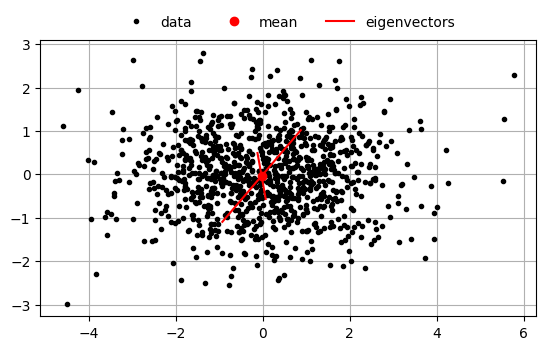

Dimensionality:
 (1000, 2)


In [114]:
# TODO: project data3d to first two principal components in and plot in 2D
#creating the reduced pca with 2 principal components
pca3dReduced, eigVecReduced, eigValReduced, meanReduced = pca(data3d, 2)
#plot data3D with only 2 PC - so plot2DPCA
plot2DPCA(pca3dReduced, meanReduced, eigVecReduced, eigValReduced)

# TODO: print dimensionality of X_reduced
#prints the dimensionality of pca3dReduced, should be (n_samples, 2)
print("Dimensionality:\n", pca3dReduced.shape)

# TODO: reconstruct from projection into 3D and plot using plot3DPCA
#creating the reconstruction-data
#(2,3).T to get(3,2) and get back 3 dimensions in form of (n_samples, 3) 
# + mean to set the center back to where it should be
recData = np.dot(pca3dReduced, eigVecReduced.T) + meanReduced

# TODO: Plot reconstruction using plot3DPCA
#plot the original data3d together with the reconstructed recData
#recData will be visible as a plane in the plot
plot3DPCA(data3d, meanReduced, eigVec, eigVal, recData=recData, showReconstruction=True)

#lost information:
#by using the first 2 components, the dimensionality is reduced from 3D to 2D => therefore plot2DPCA
#by reconstructing the 3D data from 2D, there is no information from the third PC, so the reconstruction does not perfectly match the original
#variation from the smallest variance is lost
#therefore fine structural details are missing in the reconstruction

## 5. Shape Modeling

### (a) Data Exploration (2 Points)

- The variable `bones` has shape **(nPoints, nDimensions, nShapes)**.
- Visualize all bone shapes:
  - Use `plt.scatter` to plot **each shape** in **black** with transparency (`alpha=0.5`).
  - Compute and overlay the **mean shape** in **red**.
- Ensure all bones are plotted in a **single figure** for comparison.

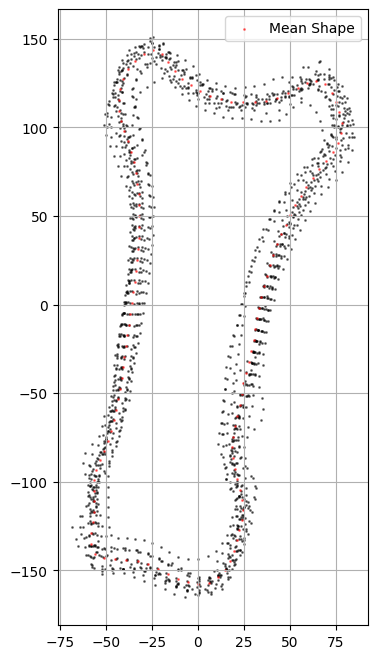

In [115]:
fig = plt.figure(figsize=(4, 8))

# TODO: Compute mean shape
mean_shape = np.mean(bones, axis=2)
#print(mean_shape)
mean_shape_2 = np.mean(bones, axis=0)
#print(mean_shape_2)


# TODO: Plot all bone shapes into a single plot
for i in range (bones.shape[2]):
    shape = bones[:, :, i]
    plt.scatter(shape[:,0], shape[:, 1],  color = 'black', alpha = 0.5, s=1)

# TODO: Plot mean shape in red in the sample plot as all other bones
plt.scatter(mean_shape[:,0], mean_shape[:, 1],  color = 'red', label = 'Mean Shape', alpha = 0.5, s=1)
plt.legend()
plt.grid(True)


### Principal Component Analysis (PCA)

- Reshape the 3D shape array `bones` into a 2D matrix of shape **(nShapes, nPoints × nDimensions)**.
- Perform **PCA** on this reshaped matrix to obtain **(2 Points)**:
  - **Eigenvectors** (principal directions)
  - **Eigenvalues** (variances)
  - **Mean shape**
- Implement a function `generate_shape(b, mean_shape, eigVec)` **(3 Points)**:
  - `b` is a coefficient vector (length = number of modes used).
  - Generate a shape by linearly combining the mean shape and a subset of eigenvectors:
    ```
    new_shape = mean_shape + b @ eigVec[:len(b), :]
    ```
  - Reshape the output `new_shape` back to shape **(nPoints, nDimensions)** for plotting.

  - Set `b = [100, 100]` and plot the newly generated shape and the mean shape together in one plot

256
14


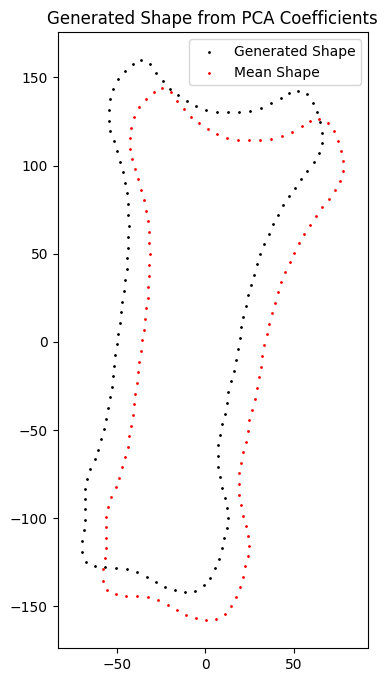

In [116]:
# TODO: Reshape bones to 2D matrix for PCA (nShapes, nPoints * nDimensions) 
nPoints, nDimensions, nShapes = bones.shape
#print(nPoints)
#print(nDimensions)
#print(nshapes)
#print(bones[0])
#print(bones[1])
#print(bones[2])
#print(bones.ndim)

mean_shape = np.mean(bones, axis=2)
# TODO: Reshape bones to 2D matrix for PCA (nShapes, nPoints * nDimensions) 
#nPoints, nDimensions, nShapes = bones.shape
bones_rs = bones.reshape(nShapes, nPoints * nDimensions).T

# TODO: Apply PCA 
_, eigVec, _ , _ = pca(bones_rs,2)
#eigVec, mean_shape = pca(bones_, 2)


# TODO: Implement generate_shape function 
def generate_shape(b, mean_shape, eigVec):
    """
    Generate a new shape using PCA coefficients.

    Parameters:
        b (np.ndarray): Coefficient vector (1D), shape (n_components,)
        mean_shape (np.ndarray): Flattened mean shape, shape (n_features,)
        eigVec (np.ndarray): PCA eigenvectors, shape (n_features, n_features)

    Returns:
        new_shape (np.ndarray): Generated shape reshaped to (nPoints, nDimensions)
    """

      # TODO: Ensure b is a row vector
    if np.ndim(b) != 1:
        return

    # TODO: Linearly combine mean with first len(b) eigenvectors
    temp_shape = mean_shape + b @ eigVec[:len(b), :]

    # TODO: Reshape back to (nPoints, nDimensions)
    new_shape = temp_shape.reshape(nPoints, nDimensions) 

    return new_shape

# TODO: Generate and plot a shape for testing 
b = [100, 100]  
#b = [100]
generated = generate_shape(b, mean_shape, eigVec)

# TODO: Plot generated shape and mean shape for comparison in one plot
plt.figure(figsize=(4, 8))
plt.scatter(generated [:,0], generated[:,1], label='Generated Shape', s=1, color='black')
plt.scatter(mean_shape[:,0], mean_shape[:, 1], label='Mean Shape', s=1, color ='red')
plt.axis('equal')
plt.title("Generated Shape from PCA Coefficients")
plt.legend()
plt.show()

### Visualize Variation Along a Single PCA Mode (4 Points)

- Write a function `visualize_shape_mode(bones, mode, num_samples=10)` that:
  1. Reshapes the 3D shape array `bones` into 2D shape for PCA: `(nShapes, nPoints * nDimensions)`.
  2. Applies PCA to extract eigenvectors, eigenvalues, and the mean shape.
  3. Plots:
     - The **mean shape** in red.
     - A series of generated shapes by varying the specified PCA mode in the range **±3λ**, where λ is the standard deviation (square root of eigenvalue) for the selected mode.
- The shapes should be plotted as transparent black points (`alpha=0.5`) in a single figure to visualize the effect of that mode together with the mean shape.
- Use `generate_shape()` internally to create shapes.
- Try different settings for `mode` as argument to the function and interpret how modes affect the overall shape of the bone.

14
256


c:\Users\S_Kai\miniconda3\envs\pca-env\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning:

Casting complex values to real discards the imaginary part

c:\Users\S_Kai\miniconda3\envs\pca-env\lib\site-packages\matplotlib\collections.py:197: ComplexWarning:

Casting complex values to real discards the imaginary part



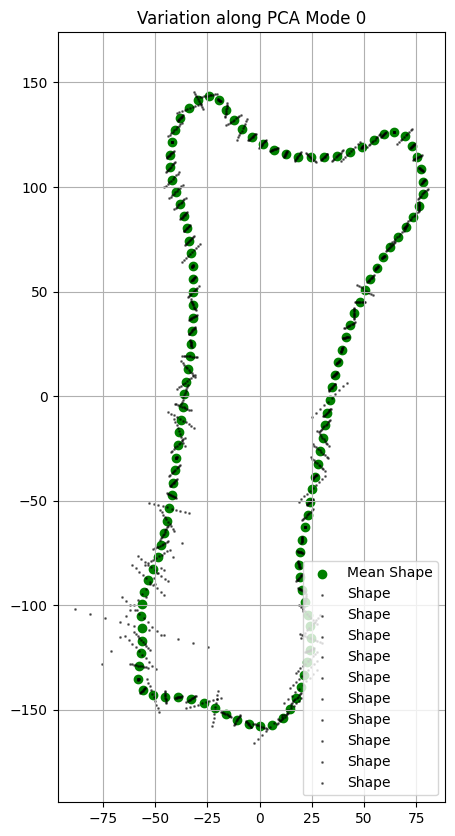

14
256


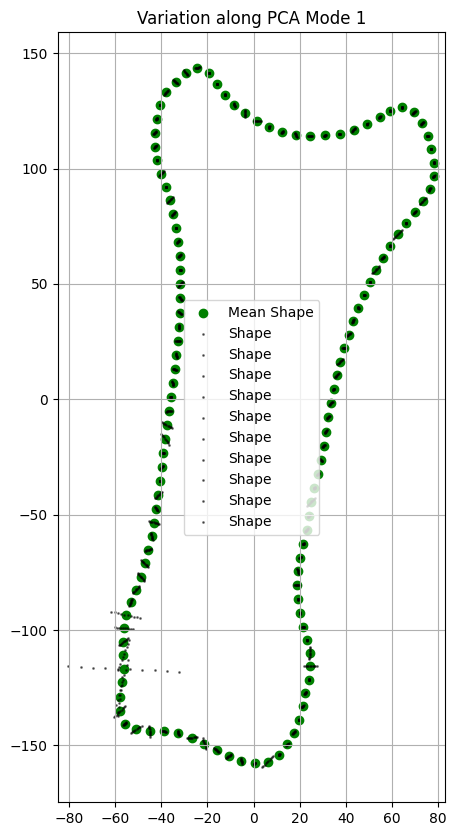

14
256


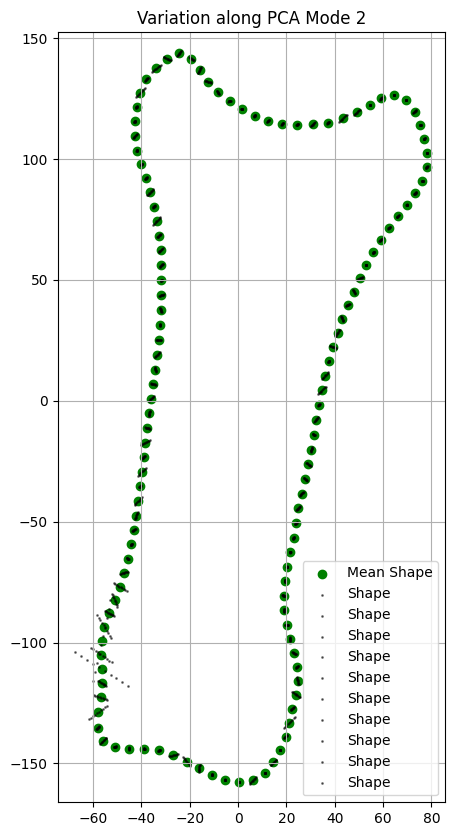

14
256


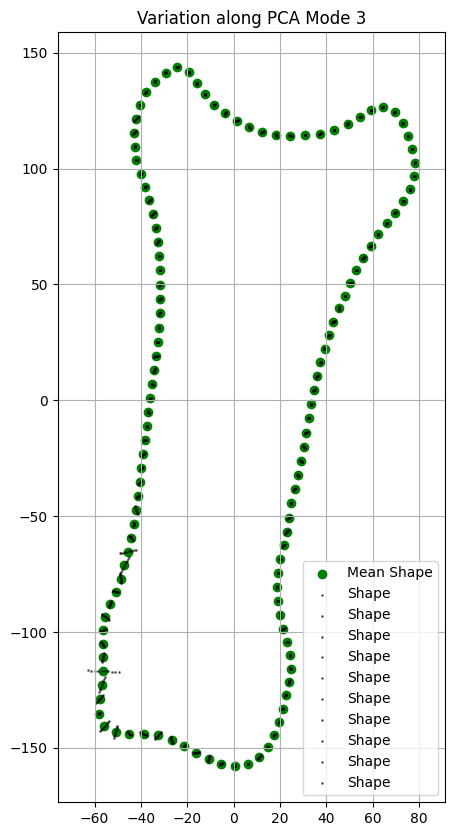

14
256


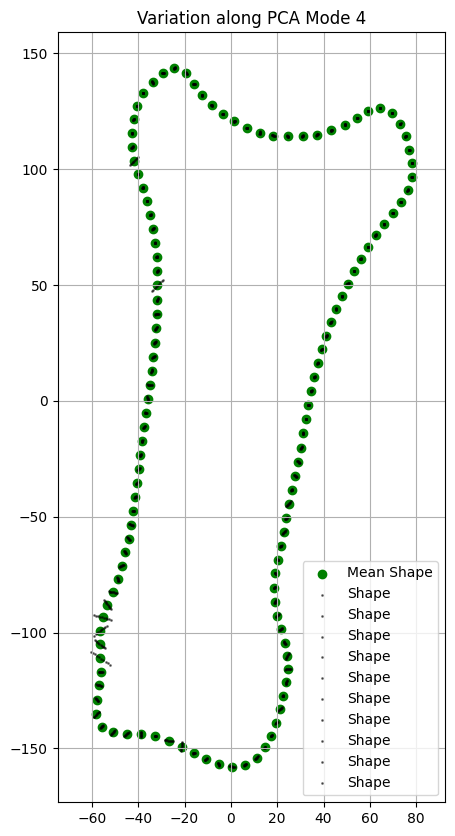

14
256


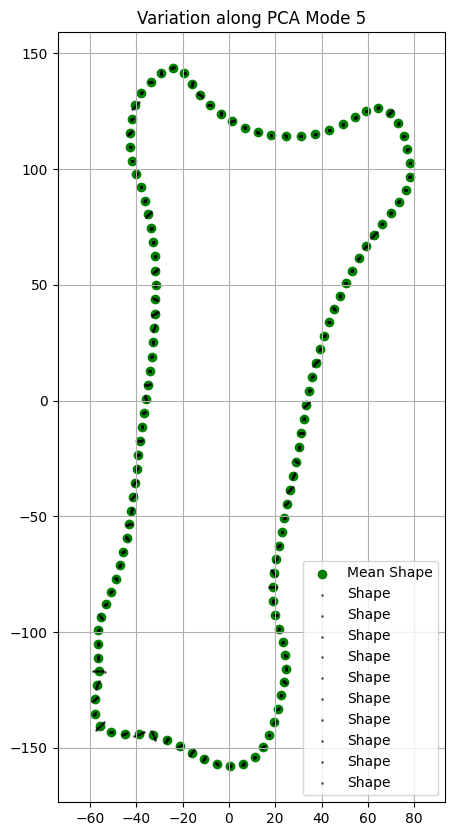

In [117]:
""" def visualize_shape_mode(bones, mode=0, num_samples=10):
    """
#    Visualize variation along a specific PCA mode using shape data.

 #   Parameters:
  #      bones (np.ndarray): 3D shape array of shape (nPoints, nDimensions, nShapes)
   #     mode (int): Index of the PCA mode to vary
    #    num_samples (int): Number of samples to generate in [-3λ, 3λ] range
"""
    # TODO: Reshape bones to 2D matrix for PCA
    bonesReshaped = bones.reshape(nShapes, nPoints * nDimensions).T

    # TODO: Apply PCA
    mean_, eigVec, eigVal, mean_shape2 = pca(bonesReshaped,2)

    # TODO: Prepare plot and plot mean shape and use generate_shape and plot new shape
    plt.figure(figsize=(5, 10))
    plt.scatter(mean_shape[:,0], mean_shape[:,1],label='Mean Shape',color='red', s=1)

    # TODO: Vary the selected mode in ±3λ
    l = np.sqrt(eigVal)
    for i in np.linspace(-3,3,num_samples):
        new_shape = generate_shape(i*l*eigVec[mode], mean_shape, eigVec)
        plt.scatter(new_shape[:,0], new_shape[:,1],color='black',label= 'Shape',alpha=0.5, s=1)

    plt.axis('equal')
    plt.title(f"Variation along PCA Mode {mode}")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_shape_mode(bones, mode=0, num_samples=10)
visualize_shape_mode(bones, mode=1, num_samples=10)
visualize_shape_mode(bones, mode=2, num_samples=10)
visualize_shape_mode(bones, mode=3, num_samples=10)

#visualize_shape_mode(bones, mode=200, num_samples=10) """


#This is for testing different outcomes, the commented out one above is our last version from today
def visualize_shape_mode(bones, mode=0, num_samples=10):
    """
    Visualize variation along a specific PCA mode using shape data.

    Parameters:
       bones (np.ndarray): 3D shape array of shape (nPoints, nDimensions, nShapes)
       mode (int): Index of the PCA mode to vary
       num_samples (int): Number of samples to generate in [-3λ, 3λ] range
    """
    nPoints, nDimensions, nShapes = bones.shape

    # TODO: Reshape bones to 2D matrix for PCA
    bonesReshaped = bones.reshape(nPoints * nDimensions, nShapes).T # varies something
    #bonesReshaped = bones.reshape(nPoints * nDimensions, nShapes) # -> throws error
    #bonesReshaped = bones.reshape(nShapes, nPoints * nDimensions).T # -> throws error
    #bonesReshaped = bones.reshape(nShapes, nPoints * nDimensions) # gives a star pattern ??


    # TODO: Apply PCA
    # our pca needs input like so: shape (n_samples, n_features)
    # n_samples ... the shapes, n_features ... dims x points
    _, eigVec, eigVal, mean_shape = pca(bonesReshaped)
    # _, eigVec, eigVal, mean_shape = pca(bonesReshaped, 2) -> throws error
    #_, eigVec, eigVal, mean_shape = pca(bonesReshaped, 1) #-> throws error on mode 1
    #_, eigVec, eigVal, mean_shape = pca(bonesReshaped, 0) #-> throws error on mode 0


    plt.figure(figsize=(5, 10))

    # TODO: Prepare plot and plot mean shape and use generate_shape and plot new shape
    # These two actually plot the same mean - idk why pca uses axis 0 and is so much longer,
    # just about what is transposed / reshaped how apparently
    plt.scatter(mean_shape.reshape(nPoints, nDimensions)[:, 0], mean_shape.reshape(nPoints, nDimensions)[:, 1],
                label='Mean Shape', color='green')
    #mean_shape2 = np.mean(bones, axis=2)
    #plt.scatter(mean_shape2[:,0], mean_shape2[:,1],label='Mean Shape',color='red', s=1)


    # TODO: Vary the selected mode in ±3λ
    l = np.sqrt(eigVal[mode])
    for i in np.linspace(-3, 3, num_samples):
        #use zeros for no variation
        b = np.zeros_like(eigVal)
        #fill numbers for variation only in the chosen mode
        b[mode] = i * l
        new_shape = generate_shape(b, mean_shape, eigVec)
        plt.scatter(new_shape[:, 0], new_shape[:, 1], color='black', label= 'Shape', alpha=0.5, s=1)

    plt.axis('equal')
    plt.title(f"Variation along PCA Mode {mode}")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_shape_mode(bones, mode=0, num_samples=10)
visualize_shape_mode(bones, mode=1, num_samples=10)
visualize_shape_mode(bones, mode=2, num_samples=10)
visualize_shape_mode(bones, mode=3, num_samples=10)
visualize_shape_mode(bones, mode=4, num_samples=10)
visualize_shape_mode(bones, mode=5, num_samples=10)


### Random Shape Sampling and Variance Thresholding (4 Points)

- Implement a function that generates random shapes from the PCA shape model using a random coefficient vector:

  ```
  b = np.random.randn(1, n_components) * stddevs[:n_components]
  ```

- The number of principal components (i.e., length of `b`) determines how many PCA modes influence the generated shape.

- Your function should:

  1. Compute the **total variance** and **cumulative explained variance** from the PCA eigenvalues.
  2. Determine how many components are needed to reach the following thresholds of total variance:
     - **100%**
     - **95%**
     - **90%**
     - **80%**
  3. For each threshold:
     - Generate a random shape using the corresponding number of PCA components.
     - Plot the generated shape in blue.
     - Overlay the **mean shape** in red for reference.
     - Use `plt.axis('equal')` and `plt.grid(True)` for consistency.
     - Add a title indicating how many components were used and what percentage of variance they capture.

- **Interpret the results**:
  - How does reducing the number of components affect the realism, detail, or variability of the generated shapes?
  - What kind of shape features are preserved vs. lost at lower variance thresholds?

In [118]:
def plot_shape_with_variance_thresholds(bones, eigVec, eigVal, mean_shape, stddevs, thresholds=[1.0, 0.95, 0.90, 0.80]):
    """
    Generate and plot random shapes using PCA components for specific variance thresholds.

    Parameters:
        bones (np.ndarray): Original 3D shape data of shape (nPoints, nDimensions, nShapes)
        eigVec (np.ndarray): PCA eigenvectors (shape: nFeatures x nFeatures)
        eigVal (np.ndarray): PCA eigenvalues
        mean_shape (np.ndarray): Flattened mean shape (1D array of length nFeatures)
        stddevs (np.ndarray): Standard deviations for each PCA mode (sqrt of eigVal)
        thresholds (list): List of variance thresholds to evaluate (default: [1.0, 0.95, 0.90, 0.80])
    """
    # TODO: Calculate total variance and explained variance ratio

    # TODO: get nPoints, nDimensions, nShapes

    # TODO: loop over thresholds
    for threshold in thresholds:

        # TODO: Determine number of components required to reach threshold
        n_components = ...
        
        # TODO: Generate random coefficient vector using stddevs and n_components

        # TODO: Generate shape from PCA components using generate_shape function

        # TODO: Plot the shape and mean shape
        plt.figure(figsize=(5, 10))
       

        plt.axis('equal')
        plt.grid(True)
        plt.title(f"{int(threshold * 100)}% Variance with {n_components} Components")
        plt.legend()
        plt.show()

In [119]:
# TODO plot the shapes with variance thresholds

plot_shape_with_variance_thresholds(bones, eigVec, eigVal, mean_shape, stddevs, thresholds=[1.0, 0.95, 0.90, 0.80])

NameError: name 'stddevs' is not defined